In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#drop id columns
train_Id = train.Id
test_Id = test.Id

train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)


In [6]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (1460, 80)
test size: (1459, 79)


# 1. Data Pre-procesing
---

### Target Variable

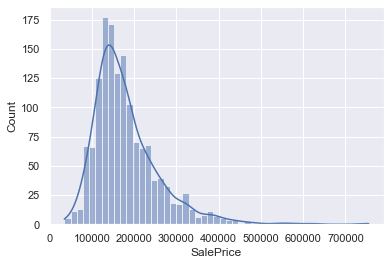

In [7]:
sns.histplot(train, x="SalePrice", kde="True")

In [8]:
print("Kurtosis: {}".format(train["SalePrice"].kurt()))
print("Skewness: {}".format(train["SalePrice"].skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


**best estimators for SalePrice**

In [9]:
corrmat = train.corr()
best_features = corrmat["SalePrice"].nlargest(10)
best_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

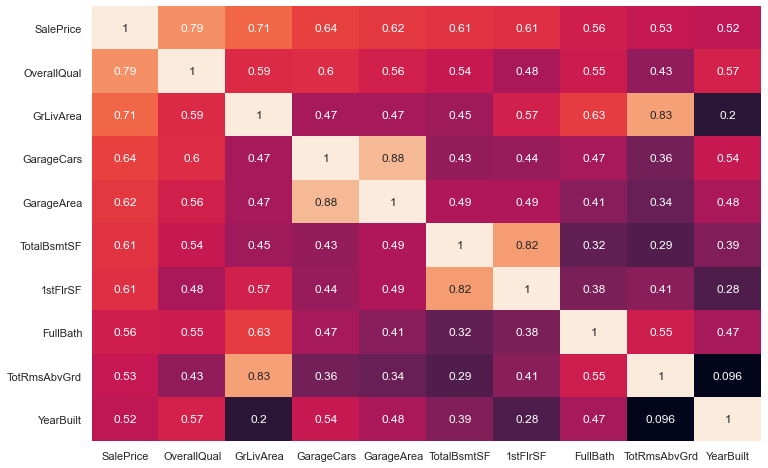

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat.loc[best_features.index, best_features.index], cbar=False, annot=True)

In [11]:
best_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

drop some feature correlated with each other

In [12]:
# best_index = best_features.index.drop(["1stFlrSF", "GarageArea", "TotRmsAbvGrd"])
# sns.pairplot(train[best_index])

**Drop outliers**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


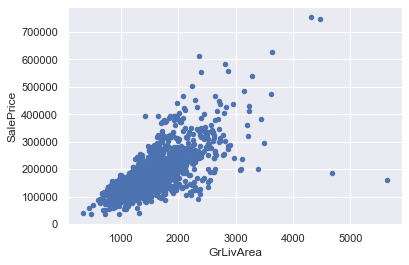

In [13]:
train.plot.scatter(y="SalePrice", x="GrLivArea")

In [14]:
def remove_outliers(df):
    outliers = df[(df["GrLivArea"]>4000) & (df["SalePrice"]<300000)].index
    df.drop(outliers, inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


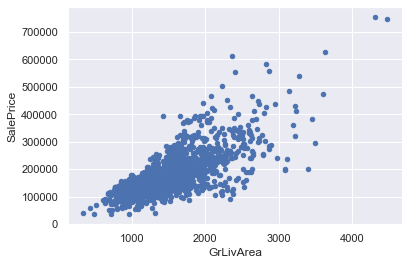

In [15]:
remove_outliers(train)
train.plot.scatter(x="GrLivArea", y="SalePrice")

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


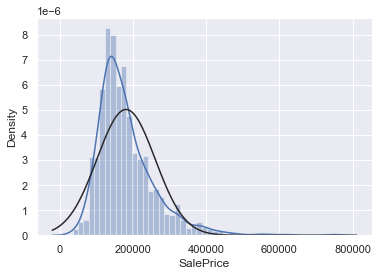

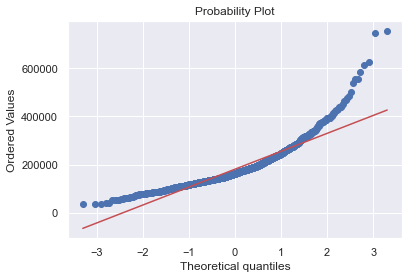

In [16]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

**Log transformation of the target varaible** (to be closer to normality)

In [17]:
def log_y(df):
    df["SalePrice"] = np.log(df["SalePrice"])

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


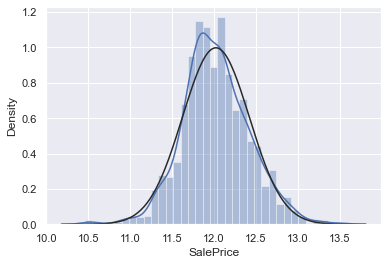

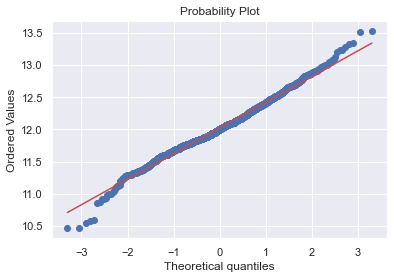

In [18]:
log_y(train)
# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

### Features engineering

Concatenate the train and test set

In [19]:
def full_dataset(train, test):
    ntrain = len(train)
    ntest = len(test)
    dataset = pd.concat([train,test])
    # dataset.drop("SalePrice", axis=1, inplace=True)

    print(f"TRAINING SIZE {train.shape}")
    print(f"TESTING SIZE {test.shape}")
    print("---")
    print("---")
    print(f"CONCATENATION {dataset.shape}")
    return dataset, ntrain

In [20]:
dataset, ntrain = full_dataset(train, test)

TRAINING SIZE (1458, 80)
TESTING SIZE (1459, 79)
---
---
CONCATENATION (2917, 80)


**Missing values (NaN)**

In [21]:
missing_rate = (dataset.isnull().sum() / dataset.shape[0]) * 100
missing_data = pd.concat([dataset.isnull().sum(), missing_rate], axis=1, keys=["total", "rate"])
missing_data.sort_values(by="total", ascending=False).head(35)

total       rate
PoolQC         2908  99.691464
MiscFeature    2812  96.400411
Alley          2719  93.212204
Fence          2346  80.425094
SalePrice      1459  50.017141
FireplaceQu    1420  48.680151
LotFrontage     486  16.660953
GarageCond      159   5.450806
GarageFinish    159   5.450806
GarageQual      159   5.450806
GarageYrBlt     159   5.450806
GarageType      157   5.382242
BsmtCond         82   2.811107
BsmtExposure     82   2.811107
BsmtQual         81   2.776826
BsmtFinType2     80   2.742544
BsmtFinType1     79   2.708262
MasVnrType       24   0.822763
MasVnrArea       23   0.788481
MSZoning          4   0.137127
BsmtHalfBath      2   0.068564
Utilities         2   0.068564
BsmtFullBath      2   0.068564
Functional        2   0.068564
Exterior2nd       1   0.034282
Exterior1st       1   0.034282
GarageArea        1   0.034282
GarageCars        1   0.034282
SaleType          1   0.034282
KitchenQual       1   0.034282
BsmtFinSF1        1   0.034282
Electrical        1   0.034282
BsmtFinSF2        1   0.034282
BsmtUnfSF         1   0.034282
TotalBsmtSF       1   0.034282

In [22]:
dataset.isna().any(0).value_counts()

False    45
True     35
dtype: int64

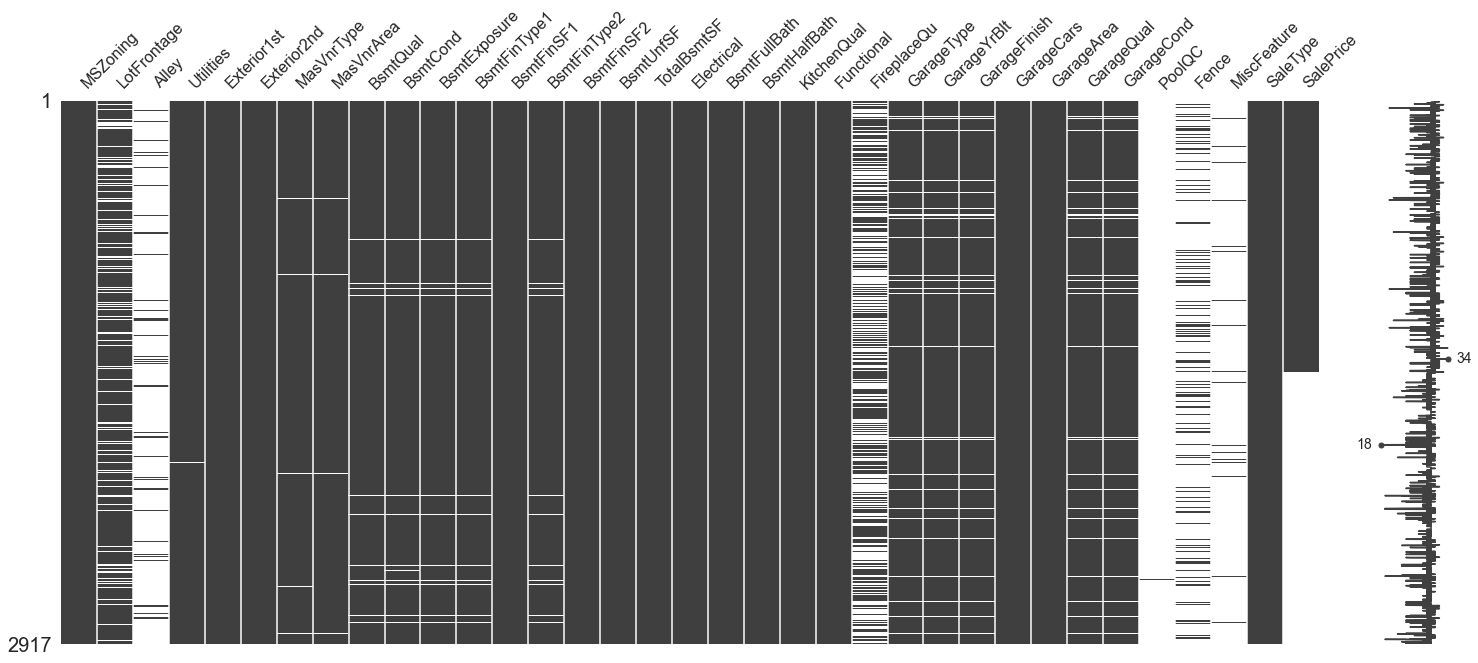

In [23]:
import missingno as msno
col_with_nan = dataset.loc[:,dataset.isna().any(0)]
msno.matrix(col_with_nan)

→ NaN values give info about house's features:
- *Basement*: 97.5%
- *Garage*: 95%
- *Fireplace*: 83%
- *Fence*: 20%
- *Alley*: 7%
- *Pool*: 1%

**Data Correlation**

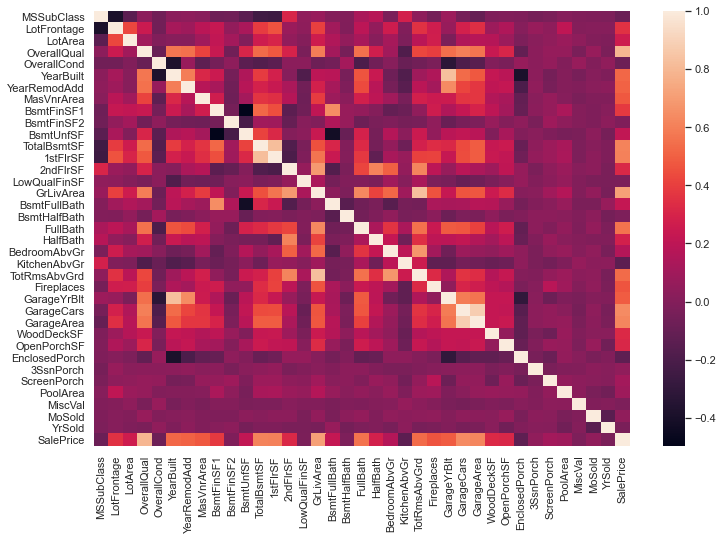

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1)

**Imputing missing values**

replace by None

In [25]:
def fill_none(df):
    replace_by_none = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "MasVnrType", "MSSubClass", 
    "GarageCond", "GarageType", "GarageFinish", "GarageQual",
    "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]
    
    for col in replace_by_none:
        df[col].fillna("None", inplace=True)

In [26]:
# fill_none(dataset)

replace by 0

In [27]:
def fill_0(df):
    replace_by_zero = ["MasVnrArea", "GarageYrBlt", "GarageArea", "GarageCars", "MasVnrArea", 
                       "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

    for col in replace_by_zero:
        df[col].fillna(0, inplace=True)

In [28]:
# fill_0(dataset)

**LotFrontage**: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. *- idea from this [beautifull notebook](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)*

In [29]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

replace by most frequent

In [30]:
def fill_mode(df):
    replace_by_mode = ["Electrical", "SaleType", "Exterior1st", 
                       "Exterior2nd", "KitchenQual", "MSZoning", "Functional"]
    
    for col in replace_by_mode:
        df[col] .fillna(df[col].mode()[0], inplace=True)

In [31]:
# fill_mode(dataset)

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [32]:
dataset["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [33]:
# dataset.drop('Utilities', axis=1, inplace=True, errors="ignore")

**create the full imputation function**

In [34]:
def imputation(df):
    print("IMPUTATION")
    print("---")
    print (f"before: {df.isna().sum().sum()}")
    fill_0(df)
    fill_mode(df)
    fill_none(df)
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    df.drop('Utilities', axis=1, inplace=True, errors="ignore")
    print (f"after: {df.isna().sum().sum()}")
    print("---")


Check if there is reamining missing value

In [35]:
imputation(dataset)
dataset.drop("SalePrice", axis=1).isna().sum().sum()

IMPUTATION
---
before: 14931
after: 1459
---


0

It remains no missing value.

### More features engineering

In [36]:
dataset.dtypes.value_counts()

object     42
int64      25
float64    12
dtype: int64

**transform numerical variables which are categorical**

In [37]:
def num_to_cat(df):
    df["MSSubClass"] = df["MSSubClass"].astype("str")
    df["MoSold"] = df["MoSold"].astype("str")
# dataset["YrSold"] = dataset["YrSold"].astype("str")

In [38]:
num_to_cat(dataset)
dataset.dtypes.value_counts()

object     44
int64      23
float64    12
dtype: int64

**label encoding some categorical data** *(contain information in their ordering)*

In [39]:
from sklearn.preprocessing import OrdinalEncoder

def label_encode(df):
    print("LABEL ENCODING")
    print("---")
    print(f"BEFORE:\n{df.dtypes.value_counts()}")
    order_mater = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
                   "HeatingQC", "CentralAir", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",  
                   "GarageCond", "PoolQC", "BsmtFinType1", "BsmtFinType1", "Functional", "LandSlope", 
                   "LotShape", "PavedDrive"]
    cat_to_int = OrdinalEncoder(dtype="int")
    df[order_mater] = cat_to_int.fit_transform(df[order_mater].values)
    print()
    print(f"AFTER:\n{df.dtypes.value_counts()}")
    print("---")

In [40]:
label_encode(dataset)

LABEL ENCODING
---
BEFORE:
object     44
int64      23
float64    12
dtype: int64

AFTER:
int64      41
object     26
float64    12
dtype: int64
---


**create new feature** *(by combining existing one)*

In [41]:
def feature_engineering(df):
    print("FEATURE ENGINEERING")
    print("---")
    print(f"before: {df.shape}")
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
    df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
    df["TotalBath"] = df["BsmtFullBath"] + 0.5 * df["BsmtHalfBath"] + \
                           df["FullBath"] + 0.5 * df["HalfBath"]
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    print(f"after: {df.shape}")
    print("---")

In [42]:
feature_engineering(dataset)
dataset.shape

FEATURE ENGINEERING
---
before: (2917, 79)
after: (2917, 84)
---


(2917, 84)

In [43]:
np.abs(dataset.corr().SalePrice).sort_values(ascending=False)[:20]

SalePrice       1.000000
TotalSF         0.825326
OverallQual     0.821404
GrLivArea       0.725211
GarageCars      0.681033
TotalBath       0.676678
GarageArea      0.656128
TotalBsmtSF     0.647563
1stFlrSF        0.620500
OverallGrade    0.607983
FullBath        0.595899
ExterQual       0.587213
YearBuilt       0.587043
BsmtQual        0.578564
YearRemodAdd    0.565992
TotRmsAbvGrd    0.537702
KitchenQual     0.537038
Fireplaces      0.491998
MasVnrArea      0.430569
HeatingQC       0.426052
Name: SalePrice, dtype: float64

#### Note:
- `TotalSF` is highly correlated with the SalePrice  
- `TotalSF`, `TotalBath` `ExterGrade` perform better than their detailled features
- creating order in `ExterQual` improve the correlation with SalePrice

**Skewed features**

In [44]:
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness.head(20)

MiscVal          21.950962
PoolQC           21.228518
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
LandSlope         4.975813
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
Functional        4.056212
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
GarageYrBlt       3.906642
GarageCond        3.596139
CentralAir        3.459334
GarageQual        3.074369
PavedDrive        2.979273
BsmtCond          2.862744
MasVnrArea        2.623068
dtype: float64

In [45]:
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")

35 features are skewed!


get closer to normality with [Box cox transformation ](https://www.statisticshowto.com/box-cox-transformation/).  

**Why not using log on skewed estimators to get normality?**  
↳ Beacause box cox give slightly better result

In [46]:
from scipy.special import boxcox1p

# def boxcox(df,threshold, lmbda):
#     num_col = df.select_dtypes(exclude="object").columns
#     skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
#     skewed_features = skewness[skewness > threshold].index
#     for feat in skewed_features:
#         df[feat] = boxcox1p(df[feat], lmbda)

def log_transform(df,threshold=0.5):
    num_data = df.select_dtypes(exclude="object")
    
    skewness = num_data.apply(lambda x: skew(x))
    skewness = skewness[abs(skewness) > 0.5]
    
    skewed_features = skewness.index
    df[skewed_features] = np.log1p(df[skewed_features])

In [47]:
# boxcox(dataset, threshold=0.75, lmbda=0.15)
log_transform(dataset)

In [48]:
# after boxcox: how many skewed estimator
num_col = dataset.select_dtypes(exclude="object").columns
skewness = np.abs(dataset[num_col].skew()).sort_values(ascending=False)
skewness = skewness[skewness > 0.75]
print(f"{skewness.count()} features are skewed!")
skewness.head(20)

28 features are skewed!


PoolQC          23.139722
PoolArea        15.631314
3SsnPorch        8.826656
LowQualFinSF     8.559041
Functional       5.459337
MiscVal          5.214687
TotalBsmtSF      4.966774
LandSlope        4.484784
GarageCond       4.317419
GarageYrBlt      3.926404
BsmtHalfBath     3.775149
GarageQual       3.526633
KitchenAbvGr     3.520694
CentralAir       3.459334
BsmtCond         3.319443
GarageGrade      3.240181
ExterCond        3.181304
PavedDrive       3.080474
ExterQual        3.060032
ScreenPorch      2.946085
dtype: float64

**Getting dummy categorical features**

In [49]:
dataset = pd.get_dummies(dataset)
dataset.shape

(2917, 264)

Split into train and test set

In [50]:
train = dataset[:ntrain]
test = dataset[ntrain:]

print(f"TRAINING shape: {train.shape}")
print(f"TESTING shape: {test.shape}")

TRAINING shape: (1458, 264)
TESTING shape: (1459, 264)


### Summary
let's begin again

In [51]:
def preprocessing():
    train = pd.read_csv("data/train.csv")
    test = pd.read_csv("data/test.csv")
    
    train.drop("Id", axis=1, inplace=True)
    test.drop("Id", axis=1, inplace=True)
        
    # work on the target of the train set
    remove_outliers(train)
    log_y(train)
    
    dataset, ntrain = full_dataset(train, test)
    imputation(dataset)
    
    # label encoding
    num_to_cat(dataset)
    label_encode(dataset)
    
    # add new features 
    feature_engineering(dataset)
    
    # arrange skewed estimator
#     boxcox(dataset, threshold=0.75, lmbda=0.15)
    log_transform(dataset)
    
    dataset = pd.get_dummies(dataset)
    
    train = dataset[:ntrain]
    test = dataset[ntrain:]
    
    print("---")
    print(f"FINAL TRAINING SIZE {train.shape}")
    print(f"FINAL TESTING SIZE {test.shape}")
    return train, test

In [52]:
train, test = preprocessing()

TRAINING SIZE (1458, 80)
TESTING SIZE (1459, 79)
---
---
CONCATENATION (2917, 80)
IMPUTATION
---
before: 15417
after: 1459
---
LABEL ENCODING
---
BEFORE:
object     44
int64      23
float64    12
dtype: int64

AFTER:
int64      41
object     26
float64    12
dtype: int64
---
FEATURE ENGINEERING
---
before: (2917, 79)
after: (2917, 84)
---
---
FINAL TRAINING SIZE (1458, 264)
FINAL TESTING SIZE (1459, 264)


# 2. Modeling
---

In [53]:
X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, learning_curve

**simple regression line**

Mean Score: 0.12663791391056473


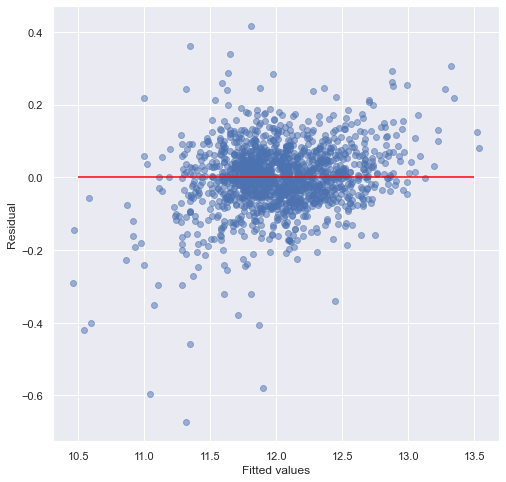

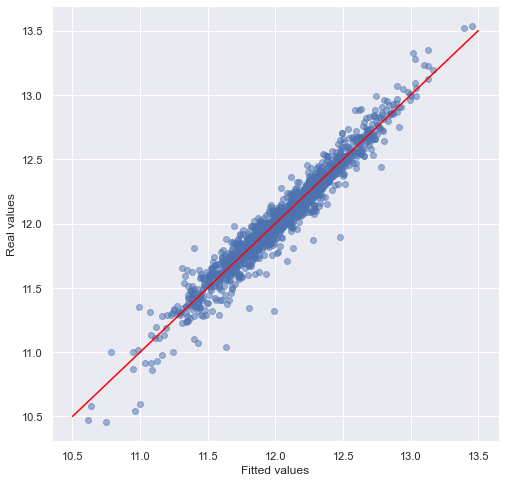

In [55]:
from sklearn.linear_model import LinearRegression

lr = make_pipeline(RobustScaler(), LinearRegression())

scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
score = np.sqrt(-scores.mean())
print(f"Mean Score: {score}")

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

residual = y_train - y_pred

# Plot residual
plt.figure(figsize=(8,8))
plt.scatter(x=y_train, y=residual, alpha=0.5)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.ylabel("Residual")
plt.xlabel("Fitted values")
plt.show()

# Plot prediction
plt.figure(figsize=(8,8))
plt.scatter(x=y_pred, y=y_train, alpha=0.5)
plt.plot([10.5,13.5], [10.5,13.5], color="red")
plt.ylabel("Real values")
plt.xlabel("Fitted values")
plt.show()

-> try to create an influence plot

**Linear regression WITH regularization**

Ridge Regularization *(L2)*

Best alpha: 15.142857142857142
---
Mean Score: 0.11356634252032634


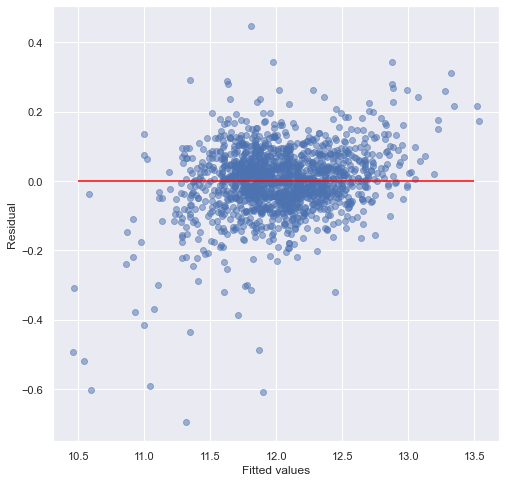

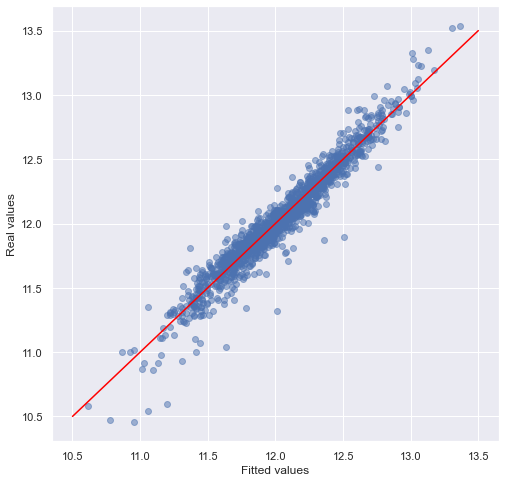

---
Ridge keep 262 features and get ride of 1


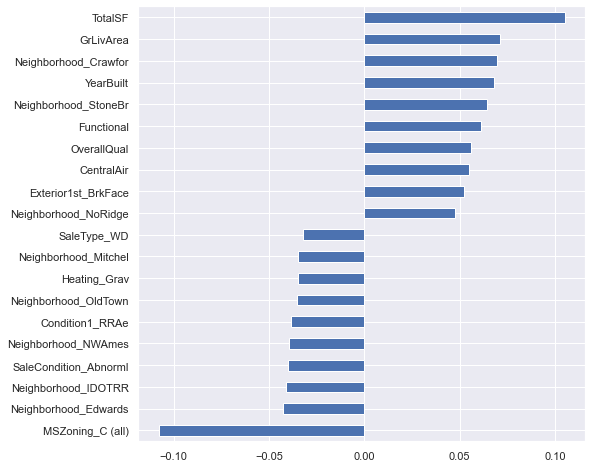

In [56]:
from sklearn.linear_model import Ridge, RidgeCV, Ridge 

l2 = make_pipeline(RobustScaler(), RidgeCV(alphas=np.linspace(1,100,50), cv=5))
l2.fit(X_train, y_train)

best_alpha = l2['ridgecv'].alpha_
print(f"Best alpha: {best_alpha}")

l2 = make_pipeline(RobustScaler(), Ridge(alpha=best_alpha))
l2.fit(X_train, y_train)
print("---")
scores = cross_val_score(l2, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
score = np.sqrt(-scores).mean()
print(f"Mean Score: {score}")

y_pred = l2.predict(X_train)

residual = y_train - y_pred

# Plot residual
plt.figure(figsize=(8,8))
plt.scatter(x=y_train, y=residual, alpha=0.5)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.ylabel("Residual")
plt.xlabel("Fitted values")
plt.show()

# Plot prediction
plt.figure(figsize=(8,8))
plt.scatter(x=y_pred, y=y_train, alpha=0.5)
plt.plot([10.5,13.5], [10.5,13.5], color="red")
plt.ylabel("Real values")
plt.xlabel("Fitted values")
plt.show()


# coef diagnostics
print("---")
coef = l2["ridge"].coef_
nul_coef = (coef == 0).sum()
print(f"Ridge keep {len(coef) - nul_coef} features and get ride of {nul_coef}")

coef_table = pd.Series(index=X_train.columns, data=coef).sort_values()
plt.figure(figsize=(8,8))
pd.concat([coef_table[:10],coef_table[-10:]]).plot.barh()

Lasso Regularization *(L1)*

Best alpha: 0.00046734693877551023
---
Mean Score: 0.11067622013226901


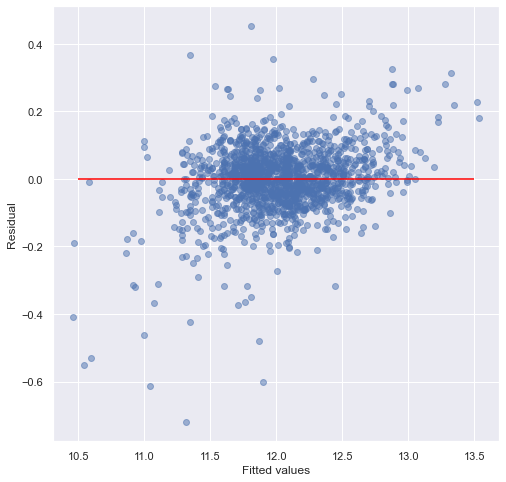

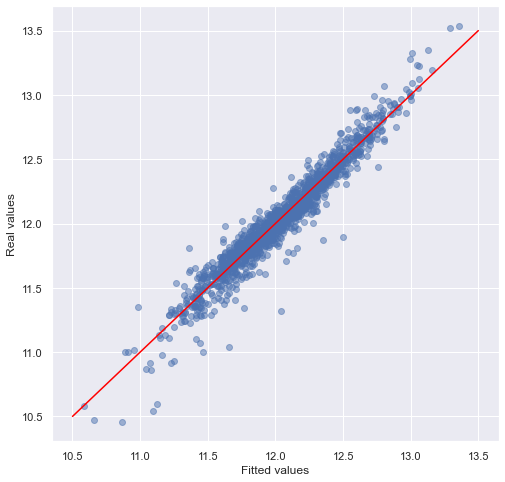

---
Ridge keep 111 features and get ride of 152


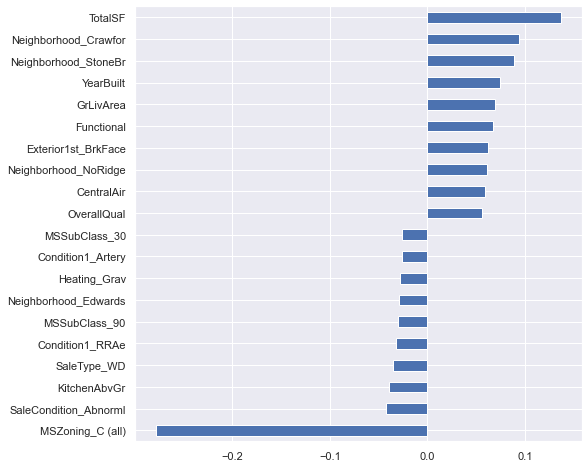

In [57]:
from sklearn.linear_model import LassoCV, Lasso

l1 = make_pipeline(RobustScaler(), LassoCV(alphas=np.linspace(1e-4,0.001, 50), max_iter = 50000, cv=5))
l1.fit(X_train, y_train)

best_alpha = l1["lassocv"].alpha_
print(f"Best alpha: {best_alpha}")

l1 = make_pipeline(RobustScaler(), Lasso(alpha=best_alpha, max_iter = 50000))
l1.fit(X_train, y_train)
print("---")
scores = cross_val_score(l1, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
score = np.sqrt(-scores).mean()
print(f"Mean Score: {score}")

y_pred = l1.predict(X_train)

residual = y_train - y_pred

# Plot residual
plt.figure(figsize=(8,8))
plt.scatter(x=y_train, y=residual, alpha=0.5)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.ylabel("Residual")
plt.xlabel("Fitted values")
plt.show()

# Plot prediction
plt.figure(figsize=(8,8))
plt.scatter(x=y_pred, y=y_train, alpha=0.5)
plt.plot([10.5,13.5], [10.5,13.5], color="red")
plt.ylabel("Real values")
plt.xlabel("Fitted values")
plt.show()


# coef diagnostics
print("---")
coef = l1["lasso"].coef_
nul_coef = (coef == 0).sum()
print(f"Ridge keep {len(coef) - nul_coef} features and get ride of {nul_coef}")

coef_table = pd.Series(index=X_train.columns, data=coef).sort_values()
plt.figure(figsize=(8,8))
pd.concat([coef_table[:10],coef_table[-10:]]).plot.barh()

ElasticNet *(L2 +L1)*

Best alpha: 1e-05
Best ratio: 1.0
---
Mean Score: 0.12422566733086751


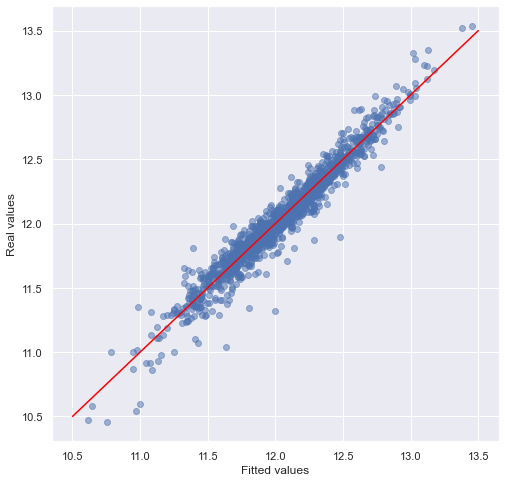

---
Ridge keep 235 features and get ride of 28


In [58]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

ELnet = make_pipeline(RobustScaler(), ElasticNetCV(l1_ratio=np.linspace(0.1,1, 10), 
                                                alphas=np.linspace(1e-5,6,10), max_iter = 50000, cv=5))
ELnet.fit(X_train, y_train)

best_alpha = ELnet["elasticnetcv"].alpha_
l1_ratio = ELnet["elasticnetcv"].l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best ratio: {l1_ratio}")

ELnet = make_pipeline(RobustScaler(), 
                      ElasticNet(l1_ratio=l1_ratio, alpha=best_alpha, max_iter = 50000)) 
ELnet.fit(X_train, y_train)


print("---")
scores = cross_val_score(ELnet, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
score = np.sqrt(-scores).mean()
print(f"Mean Score: {score}")

y_pred = ELnet.predict(X_train)

residual = y_train - y_pred

# Plot residual
plt.figure(figsize=(8,8))
plt.scatter(x=y_train, y=residual, alpha=0.5)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.ylabel("Residual")
plt.xlabel("Fitted values")
plt.show()

# Plot prediction
plt.figure(figsize=(8,8))
plt.scatter(x=y_pred, y=y_train, alpha=0.5)
plt.plot([10.5,13.5], [10.5,13.5], color="red")
plt.ylabel("Real values")
plt.xlabel("Fitted values")
plt.show()


# coefs diagnostics
print("---")
coef = ELnet["elasticnet"].coef_
nul_coef = (coef == 0).sum()
print(f"Ridge keep {len(coef) - nul_coef} features and get ride of {nul_coef}")

coef_table = pd.Series(index=X_train.columns, data=coef).sort_values()
plt.figure(figsize=(8,8))
pd.concat([coef_table[:10],coef_table[-10:]]).plot.barh()

In [59]:
# Compared with our Compared Models classe
# Read Regularized Linear Models
# Read XGBOOST
# READ Stacked Regressions : Top 4% on LeaderBoard

### Compared models

In [60]:
import plotly.express as px
from sklearn.model_selection import cross_val_score, learning_curve

# create a class to keep track of the performance
class CompareModels():
    def __init__(self, models, X, y, scoring="neg_mean_squared_error"):
        self.models = models
        self.scoring = scoring
        self.names = []
        self.scores = []
        self.X = X
        self.y = y
        
    def get_scores(self):
        for name, model in self.models.items():
            score = cross_val_score(model, self.X, self.y, scoring=self.scoring, cv=7)
            score = np.sqrt(-score)
            self.names.append(name)
            self.scores.append(np.array(score))
            print(f"{name:-<20}> {score.mean():.2f} (+/-{(score).std():.2f})")


    def create_table(self):
        self.table = pd.DataFrame({model:scores for model,scores in zip(self.names, self.scores)})
        self.table.columns.name = "Model"
        self.table = self.table.unstack().reset_index(0)
        self.table = self.table.rename(columns={0:self.scoring})
            
    def summary_table(self):
        return self.table.groupby("Model").mean().reset_index()
    
    def box_plot(self):
        fig = px.box(self.table, y=self.scoring, x="Model")
        fig.update_layout(title="Compare Models")
        fig.show()
        
    def learning_curve(self):
        for name, model in self.models.items():
            N, train_score, val_score = learning_curve(model, self.X, self.y, cv=3, 
                                                       scoring="neg_mean_squared_error",
                                                       train_sizes=np.linspace(0.1,1,10))
            plt.figure(figsize=(12,8))
            plt.plot(N, np.sqrt(-train_score.mean(axis=1)), label="train score")
            plt.plot(N, np.sqrt(-val_score.mean(axis=1)), label="val score")
            plt.title(name)
            plt.legend()
    
    def recap(self):
        self.get_scores()
        self.create_table()
        self.box_plot()
        display(self.summary_table().sort_values(by=self.scoring,ascending=False))  

In [61]:
list_of_models = {
    "Linear Reg":lr, 
    "Ridge":l2, 
    "Lasso":l1, 
    "ElasticNet":ELnet, 
}

In [62]:
models = CompareModels(list_of_models, X_train, y_train)
models.recap()

Linear Reg----------> 0.12 (+/-0.01)
Ridge---------------> 0.11 (+/-0.01)
Lasso---------------> 0.11 (+/-0.01)
ElasticNet----------> 0.12 (+/-0.01)


Model  neg_mean_squared_error
2  Linear Reg                0.123904
0  ElasticNet                0.121646
3       Ridge                0.111309
1       Lasso                0.109516

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4404589178808265, tolerance: 0.009544805325716369



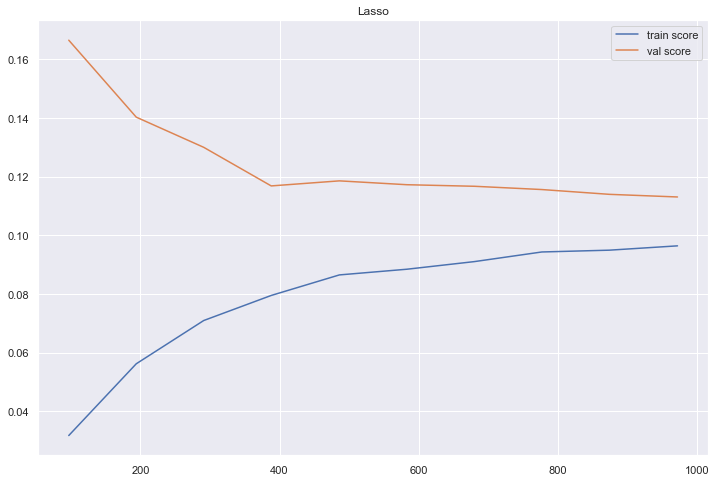

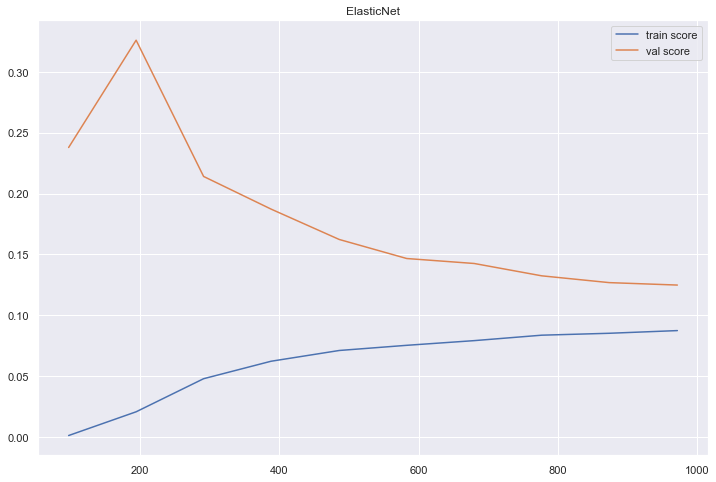

In [63]:
models.learning_curve()

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

RandomForest = make_pipeline(RandomForestRegressor(random_state=42))
AdaBoost = make_pipeline(AdaBoostRegressor(random_state=42))
SVM_linear = make_pipeline(RobustScaler(), SVR(kernel="linear"))
SVM_rbf = make_pipeline(RobustScaler(), SVR(kernel="rbf"))
KNN = make_pipeline(RobustScaler(), KNeighborsRegressor())

list_of_models = {
    "Lasso":l1, 
    "RandomForest":RandomForest, 
    "AdaBoost":AdaBoost, 
    "SVM_linear":SVM_linear, 
    "SVM_rbf":SVM_rbf,  
    "KNN":KNN
}


models = CompareModels(list_of_models, X_train, y_train)
models.recap()

Lasso---------------> 0.11 (+/-0.01)
RandomForest--------> 0.13 (+/-0.01)
AdaBoost------------> 0.17 (+/-0.01)
SVM_linear----------> 0.12 (+/-0.01)
SVM_rbf-------------> 0.15 (+/-0.01)
KNN-----------------> 0.18 (+/-0.01)


Model  neg_mean_squared_error
1           KNN                0.175041
0      AdaBoost                0.165479
5       SVM_rbf                0.147612
3  RandomForest                0.134538
4    SVM_linear                0.122507
2         Lasso                0.109516

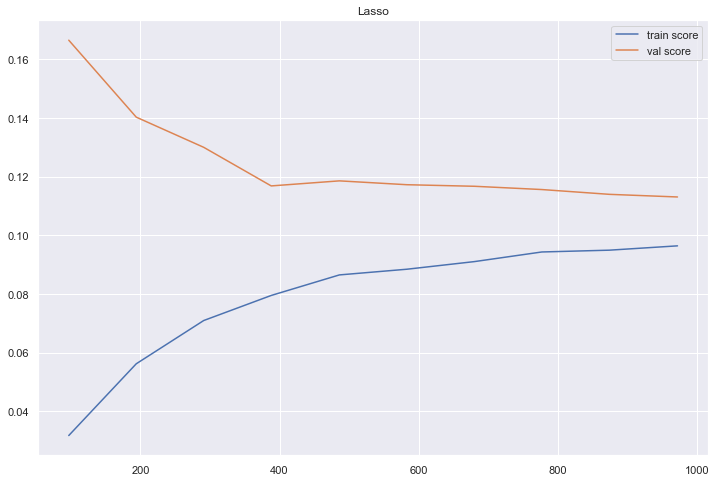

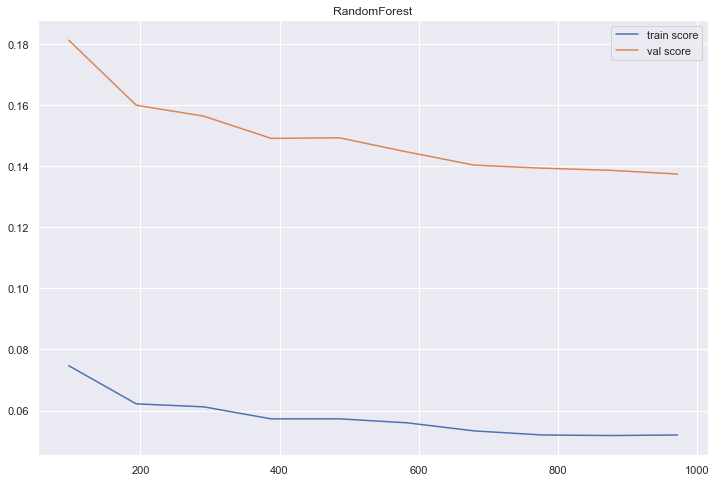

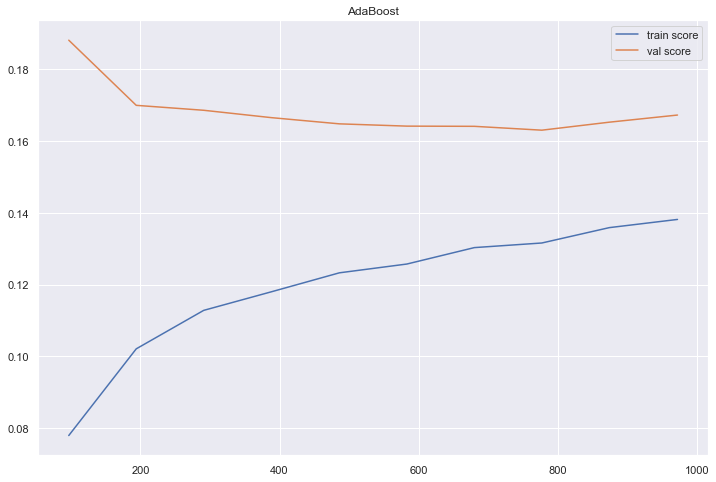

In [65]:
models.learning_curve()

In [66]:
## Models we will pick : Lasso, Random Forest, SVR

In [67]:
# lasso
from sklearn.model_selection import RandomizedSearchCV

l1 = make_pipeline(RobustScaler(), Lasso(max_iter = 50000))
params = {"lasso__alpha":np.linspace(1e-5, 1e-3, 50)}

l1_grid = RandomizedSearchCV(l1, params, cv=5, n_iter=40, scoring="neg_mean_squared_error")
l1_grid.fit(X_train, y_train)

print(f"Best scores: {np.sqrt(-l1_grid.best_score_)}")
print(f"Best model: {l1_grid.best_params_}")

Best scores: 0.1108956099361784
Best model: {'lasso__alpha': 0.00047469387755102045}


In [76]:
# svm
# svr = make_pipeline(RobustScaler(), SVR(kernel="linear"))
# params = {"svr__C":np.linspace(1e-3, 1e3, 50),
#          "svr__epsilon": np.linspace(1e-4, 1e2, 50)}

# svr_grid = RandomizedSearchCV(svr, params, cv=5, n_iter=40, scoring="neg_mean_squared_error")
# svr_grid.fit(X_train, y_train)

# print(f"Best scores: {np.sqrt(-svr_grid.best_score_)}")
# print(f"Best model: {svr_grid.best_params_}")

In [77]:
RandomForestRegressor(random_state=42).get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [78]:
# # random forest
# params = {"n_estimators":[100, 125, 150],
#          "max_depth": np.linspace(2, 100, 50)}

# RF_grid = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
#                              params, cv=5, n_iter=40, scoring="neg_mean_squared_error")
# RF_grid.fit(X_train, y_train)

# print(f"Best scores: {RF_grid.best_score_}")
# print(f"Best model: {RF_grid.best_params_}")

### Ensemble methods

In [106]:
models = [("Lasso", l1_grid.best_estimator_),
          ("ELasticNet", l2),
#           ("Random_forest", RandomForest),
#           ("SVR", SVM_linear)
         ]

#### Vote

In [107]:
from sklearn.ensemble import VotingRegressor

vote = VotingRegressor(models)

scores = cross_val_score(vote, X_train, y_train , scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean()} (+/- {score.std()})")

RMSE: 0.11346210341839673 (+/- 0.0070403180281567515)


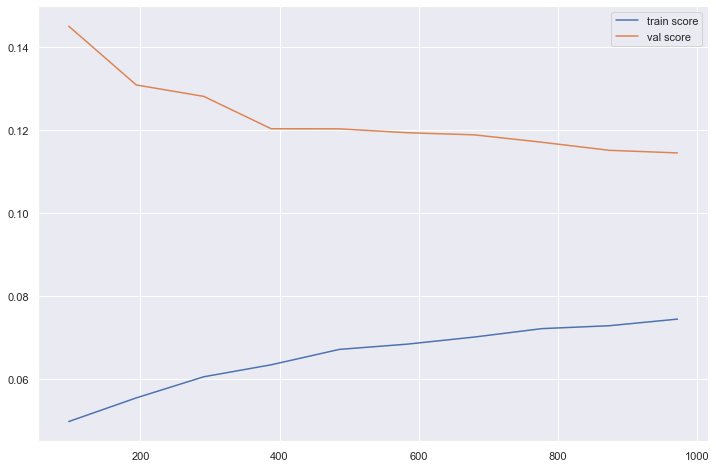

In [97]:
N, train_score, val_score = learning_curve(vote, X_train, y_train, cv=3, 
                                           scoring="neg_mean_squared_error",
                                           train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(12,8))
plt.plot(N, np.sqrt(-train_score).mean(axis=1), label="train score")
plt.plot(N, np.sqrt(-val_score).mean(axis=1), label="val score")
plt.legend()

#### Stacking

In [99]:
from sklearn.ensemble import StackingRegressor

stack = StackingRegressor(models, final_estimator=KNeighborsRegressor())

scores = cross_val_score(stack, X_train, y_train , scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean()} (+/- {score.std()})")

RMSE: 0.1221247661055062 (+/- 0.0059663540667742355)


In [ ]:
N, train_score, val_score = learning_curve(vote, X_train, y_train, cv=3, 
                                           scoring="neg_mean_squared_error",
                                           train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(12,8))
plt.plot(N, np.sqrt(-train_score).mean(axis=1), label="train score")
plt.plot(N, np.sqrt(-val_score).mean(axis=1), label="val score")
plt.legend()

# 3. Submission 

In [108]:
final_model = l1_grid.best_estimator_
final_model.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.00047469387755102045, max_iter=50000))])

In [109]:
X_test = test.drop("SalePrice", axis=1)

In [110]:
y_pred = final_model.predict(X_test)
y_pred = np.exp(y_pred)

In [112]:
submission =pd.DataFrame({"Id":test_Id, "SalePrice":y_pred})
submission.to_csv("data/my_submision_V2.csv", index=False)

In [113]:
cat "data/my_submision.csv"

Id,SalePrice
1461,121980.0
1462,158600.0
1463,171859.0
1464,185100.0
1465,172000.0
1466,176200.0
1467,172700.0
1468,172520.0
1469,186698.0
1470,119470.0
1471,185180.0
1472,93420.0
1473,85640.0
1474,138180.0
1475,121800.0
1476,380890.4
1477,266850.0
1478,306930.0
1479,259992.2
1480,548631.4
1481,333051.2
1482,206380.0
1483,176859.0
1484,171680.0
1485,178586.4
1486,210000.0
1487,317383.6
1488,234600.0
1489,207000.0
1490,211975.6
1491,184120.0
1492,107260.0
1493,171157.0
1494,278392.2
1495,260900.0
1496,245500.0
1497,183728.0
1498,157500.0
1499,160200.0
1500,162830.0
1501,197180.0
1502,150590.0
1503,284800.0
1504,231480.0
1505,223460.0
1506,177003.2
1507,273600.0
1508,198900.0
1509,155500.0
1510,147750.0
1511,142300.0
1512,185098.0
1513,141580.0
1514,162900.0
1515,198800.0
1516,140380.0
1517,173100.0
1518,122240.0
1519,227875.0
1520,138220.0
1521,145500.0
1522,177100.0
1523,119701.6
1524,125600.0
1525,119600.0
1526,116180.0
1527,99070.0
1528,135000.0
1529,145437.4
1530,183180.0
1531,13588

In [114]:
cat "data/my_submision_V2.csv"

Id,SalePrice
1461,119250.71947230009
1462,154826.59381169642
1463,182761.48985176286
1464,196451.01766652078
1465,198213.98065624645
1466,169575.55758910748
1467,177126.78945860508
1468,161028.8511251323
1469,192145.31838383997
1470,117067.61819215563
1471,196862.83301643448
1472,94789.09106296388
1473,91699.97230810866
1474,143114.73376405388
1475,105932.61345073154
1476,366658.93123530946
1477,249415.02153281897
1478,287925.8161467828
1479,284345.43403890525
1480,454837.3268930752
1481,314678.4071982014
1482,210812.5759606868
1483,182363.02870304606
1484,158517.00639195507
1485,189913.18256407234
1486,195217.85942556805
1487,329033.33995274804
1488,234371.3574428695
1489,192596.53776259176
1490,238883.0399646109
1491,194720.5830420456
1492,89043.20671844044
1493,177929.15131934104
1494,296326.2606291926
1495,290344.7026668934
1496,229024.6073681264
1497,177296.16695649058
1498,166053.7164198627
1499,159175.69400968475
1500,155537.06877080526
1501,175289.03709008906
1502,140956.989285